#### Pipeline

#### Acquire

- get the data into pandas
- look at it
    - describe, info, head, shape
- understand what your data means
    - know what each column is
    - know what your target variable is
#### Wrangle

- clean the data
    - handle nulls
    - handle outliers
    - correct datatypes
- univariate analysis (looking at only one variable)
- encode variables -- Preprocessing
- split into train, validate/, test
- scale data (after train/validate/test split) -- Preprocessing
- document how you're changing the data
#### Explore

- use only train data!
    - use unscaled data
- establish relationships using multivariate analysis
    - hypothesize
    - visualize
    - statistize
    - summarize
- feature engineering
    - when using RFE, use scaled data
#### Model

- use scaled/encoded data
- split into X_variables and y_variables
    - X_train, y_train, X_validate, y_validate, X_test, y_test
- build models
    - make the thing
    - fit the thing (on train)
    - use the thing
- evaluate models on train and validate
- pick the best model and evaluate it on test

# Zillow Project:
## How to predict home value


## Imports

In [1]:
#tabular data imports :
import pandas as pd
import numpy as np
import env
from env import user, password, host
from pydataset import data

# visualization imports:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
# success metrics from earlier in the week: mean squared error and r^2 explained variance
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

from scipy.stats import pearsonr, spearmanr
from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")
import wrangle as w
import os
directory = os.getcwd()

# Data Dictionary


| Feature | Definition |
|:--------|:-----------|
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |
|  |  |

## Acquire
#### - Data acquired from the CodeUp mySQL server, the zillow database was gathered during the Tobias cohort.
#### - Size of data ((65418 rows, 13 columns)
#### - Each row represents a single family home transaction
#### - Each column represents a feature for the transaction

## Zillow data

In [2]:
df_zillow = w.get_zillow_data()
df_zillow.head()

,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,lotsizesquarefeet,fips,latitude,longitude,transactiondate,propertylandusedesc,taxvaluedollarcnt,percentile_rank
0,36907,2.0,1.0,660.0,1944.0,3001.0,6037.0,33976703.0,-118170821.0,2017-05-17,Single Family Residential,271071.0,0.010007
1,37364,1.0,1.0,660.0,1973.0,83449.0,6037.0,33821400.0,-118187000.0,2017-05-18,Condominium,127105.0,0.010007
2,37527,2.0,1.0,660.0,1948.0,2890.0,6037.0,33798781.0,-118182351.0,2017-05-18,Single Family Residential,186152.0,0.010007
3,44968,2.0,1.0,660.0,1952.0,3220.0,6111.0,34266302.0,-119273503.0,2017-06-09,Single Family Residential,442907.0,0.010007
4,34820,2.0,1.0,660.0,1924.0,4166.0,6037.0,34030533.0,-118201517.0,2017-05-10,Single Family Residential,167516.0,0.010007


In [3]:
df_zillow.shape

(65418, 13)

In [4]:
df_zillow.isnull().sum()

id                              0
bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
yearbuilt                       0
lotsizesquarefeet               0
fips                            0
latitude                        0
longitude                       0
transactiondate                 0
propertylandusedesc             0
taxvaluedollarcnt               6
percentile_rank                 0
dtype: int64

In [5]:
df_zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
id,65418.0,3.855947e+04,22386.284469,2.000000e+01,1.931525e+04,3.842350e+04,5.726575e+04,7.761200e+04
bedroomcnt,65418.0,3.235226e+00,0.998679,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.200000e+01
bathroomcnt,65418.0,2.251032e+00,0.884908,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.200000e+01
calculatedfinishedsquarefeet,65418.0,1.774485e+03,753.787812,6.600000e+02,1.236000e+03,1.588000e+03,2.131000e+03,5.057000e+03
yearbuilt,65418.0,1.962263e+03,22.383730,1.808000e+03,1.950000e+03,1.961000e+03,1.978000e+03,2.016000e+03
lotsizesquarefeet,65418.0,2.269777e+04,118941.328188,3.430000e+02,5.764000e+03,7.009000e+03,9.753000e+03,6.971010e+06
fips,65418.0,6.047667e+03,20.820051,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
latitude,65418.0,3.402233e+07,238523.338416,3.333960e+07,3.385108e+07,3.402972e+07,3.417742e+07,3.480695e+07
longitude,65418.0,-1.182264e+08,342674.845430,-1.194484e+08,-1.184127e+08,-1.181972e+08,-1.179769e+08,-1.175559e+08
taxvaluedollarcnt,65412.0,4.140246e+05,417276.495570,5.942000e+03,1.884698e+05,3.193645e+05,5.070352e+05,1.472112e+07


# Prepare
#### Prepare

- perform univariate stats
- clean up data
- encode data
- split data

### Prepare Actions:

- Removed columns that did not contain useful information
- Renamed columns to promote readability
- Checked for nulls in the data (there were none)
- Checked that column data types were appropriate
- Added additional features to investigate:
    - ENTER HERE
    - MORE DATA
    - EVEN MORE
    - GOOD ENOUGH?
- Compare categorical variables
- Split data into train(60), validate(20) and test(20) (no stratifying)
- Scale continuous variable
- Outliers within 1% of max or min of square feet (sqft) have been removed for this iteration of the project

In [6]:
df = w.prep_zillow(w.get_zillow_data())
df.head()

,id,bedrooms,bathrooms,sqft,yearbuilt,lot_sqft,county,latitude,longitude,transaction_date,property_class,taxvalue,percentile_rank
0,36907,2,1.0,660,1944,3001,LA,33976703.0,-118170821.0,2017-05-17,Single Family Residential,271071,0.010007
1,37364,1,1.0,660,1973,83449,LA,33821400.0,-118187000.0,2017-05-18,Condominium,127105,0.010007
2,37527,2,1.0,660,1948,2890,LA,33798781.0,-118182351.0,2017-05-18,Single Family Residential,186152,0.010007
3,44968,2,1.0,660,1952,3220,Ventura,34266302.0,-119273503.0,2017-06-09,Single Family Residential,442907,0.010007
4,34820,2,1.0,660,1924,4166,LA,34030533.0,-118201517.0,2017-05-10,Single Family Residential,167516,0.010007


In [7]:
df = df.set_index('id')
df.drop(['percentile_rank'], axis=1, inplace=True)
df.head()

,bedrooms,bathrooms,sqft,yearbuilt,lot_sqft,county,latitude,longitude,transaction_date,property_class,taxvalue
id,,,,,,,,,,,
36907,2,1.0,660,1944,3001,LA,33976703.0,-118170821.0,2017-05-17,Single Family Residential,271071
37364,1,1.0,660,1973,83449,LA,33821400.0,-118187000.0,2017-05-18,Condominium,127105
37527,2,1.0,660,1948,2890,LA,33798781.0,-118182351.0,2017-05-18,Single Family Residential,186152
44968,2,1.0,660,1952,3220,Ventura,34266302.0,-119273503.0,2017-06-09,Single Family Residential,442907
34820,2,1.0,660,1924,4166,LA,34030533.0,-118201517.0,2017-05-10,Single Family Residential,167516


In [8]:
df['rm_X_sqft'] = round((df['bathrooms'] + df['bedrooms'])/df['sqft'], 6)
df.head()

,bedrooms,bathrooms,sqft,yearbuilt,lot_sqft,county,latitude,longitude,transaction_date,property_class,taxvalue,rm_X_sqft
id,,,,,,,,,,,,
36907,2,1.0,660,1944,3001,LA,33976703.0,-118170821.0,2017-05-17,Single Family Residential,271071,0.004545
37364,1,1.0,660,1973,83449,LA,33821400.0,-118187000.0,2017-05-18,Condominium,127105,0.003030
37527,2,1.0,660,1948,2890,LA,33798781.0,-118182351.0,2017-05-18,Single Family Residential,186152,0.004545
44968,2,1.0,660,1952,3220,Ventura,34266302.0,-119273503.0,2017-06-09,Single Family Residential,442907,0.004545
34820,2,1.0,660,1924,4166,LA,34030533.0,-118201517.0,2017-05-10,Single Family Residential,167516,0.004545


In [9]:
df['rm_X_all_sqft'] = round((df['bathrooms'] + df['bedrooms']) / (df['sqft'] + df['lot_sqft']), 6)
df.head()

,bedrooms,bathrooms,sqft,yearbuilt,lot_sqft,county,latitude,longitude,transaction_date,property_class,taxvalue,rm_X_sqft,rm_X_all_sqft
id,,,,,,,,,,,,,
36907,2,1.0,660,1944,3001,LA,33976703.0,-118170821.0,2017-05-17,Single Family Residential,271071,0.004545,0.000819
37364,1,1.0,660,1973,83449,LA,33821400.0,-118187000.0,2017-05-18,Condominium,127105,0.003030,0.000024
37527,2,1.0,660,1948,2890,LA,33798781.0,-118182351.0,2017-05-18,Single Family Residential,186152,0.004545,0.000845
44968,2,1.0,660,1952,3220,Ventura,34266302.0,-119273503.0,2017-06-09,Single Family Residential,442907,0.004545,0.000773
34820,2,1.0,660,1924,4166,LA,34030533.0,-118201517.0,2017-05-10,Single Family Residential,167516,0.004545,0.000622


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65412 entries, 36907 to 38353
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          65412 non-null  int64  
 1   bathrooms         65412 non-null  float64
 2   sqft              65412 non-null  int64  
 3   yearbuilt         65412 non-null  int64  
 4   lot_sqft          65412 non-null  int64  
 5   county            65412 non-null  object 
 6   latitude          65412 non-null  float64
 7   longitude         65412 non-null  float64
 8   transaction_date  65412 non-null  object 
 9   property_class    65412 non-null  object 
 10  taxvalue          65412 non-null  int64  
 11  rm_X_sqft         65412 non-null  float64
 12  rm_X_all_sqft     65412 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 7.0+ MB


In [11]:
df.shape

(65412, 13)

In [12]:
df.isnull().sum()

bedrooms            0
bathrooms           0
sqft                0
yearbuilt           0
lot_sqft            0
county              0
latitude            0
longitude           0
transaction_date    0
property_class      0
taxvalue            0
rm_X_sqft           0
rm_X_all_sqft       0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,65412.0,3.235247e+00,0.998677,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.200000e+01
bathrooms,65412.0,2.251070e+00,0.884915,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.200000e+01
sqft,65412.0,1.774520e+03,753.797263,6.600000e+02,1.236000e+03,1.588000e+03,2.131000e+03,5.057000e+03
yearbuilt,65412.0,1.962263e+03,22.382795,1.808000e+03,1.950000e+03,1.961000e+03,1.978000e+03,2.016000e+03
lot_sqft,65412.0,2.269858e+04,118946.703567,3.430000e+02,5.764000e+03,7.009000e+03,9.753000e+03,6.971010e+06
latitude,65412.0,3.402234e+07,238529.605211,3.333960e+07,3.385108e+07,3.402974e+07,3.417743e+07,3.480695e+07
longitude,65412.0,-1.182264e+08,342677.587149,-1.194484e+08,-1.184128e+08,-1.181972e+08,-1.179769e+08,-1.175559e+08
taxvalue,65412.0,4.140246e+05,417276.495570,5.942000e+03,1.884698e+05,3.193645e+05,5.070352e+05,1.472112e+07
rm_X_sqft,65412.0,3.280685e-03,0.000746,4.150000e-04,2.740000e-03,3.252000e-03,3.788000e-03,1.204800e-02
rm_X_all_sqft,65412.0,5.999251e-04,0.000308,1.000000e-06,4.340000e-04,5.950000e-04,7.510000e-04,2.913000e-03


In [14]:
pd.crosstab(df.property_class, df.county)

county,LA,Orange,Ventura
property_class,,,
Cluster Home,0,0,274
Condominium,6703,186,347
"Duplex (2 Units, Any Combination)",2527,12,7
"Manufactured, Modular, Prefabricated Homes",0,0,27
Mobile Home,40,0,10
Residential General,16,0,0
Single Family Residential,36078,13641,4644
Townhouse,6,0,0
"Triplex (3 Units, Any Combination)",884,6,4


#### too many dates for
        - pd.crosstab(df.property_class, df.transaction_date)

In [15]:
df.county.value_counts(normalize=True)

LA         0.707118
Orange     0.211658
Ventura    0.081224
Name: county, dtype: float64

In [16]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft', 'yearbuilt', 'lot_sqft', 'county',
       'latitude', 'longitude', 'transaction_date', 'property_class',
       'taxvalue', 'rm_X_sqft', 'rm_X_all_sqft'],
      dtype='object')

# EXPLORE

## Univariate Analysis pre-scaling

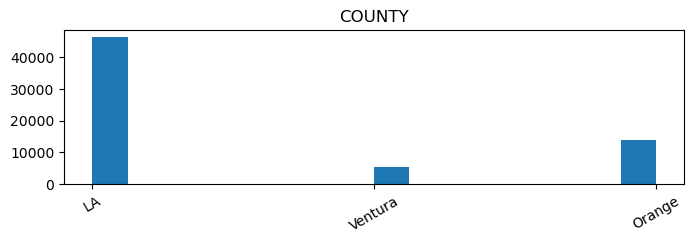

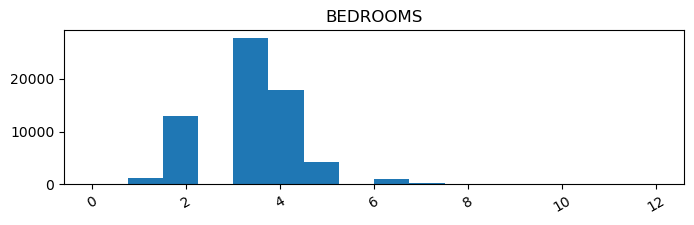

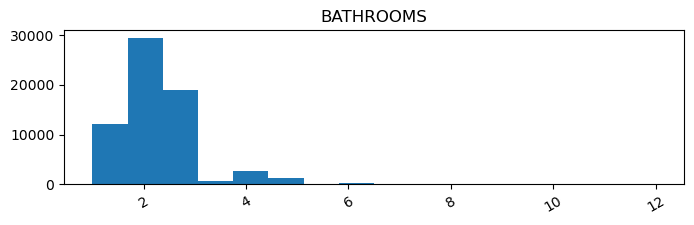

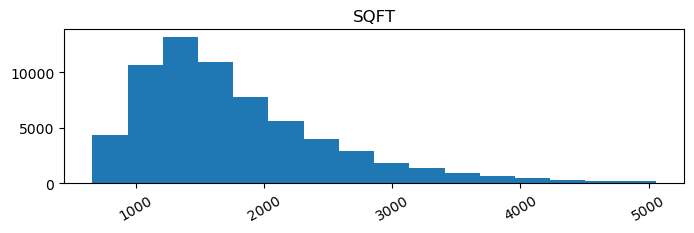

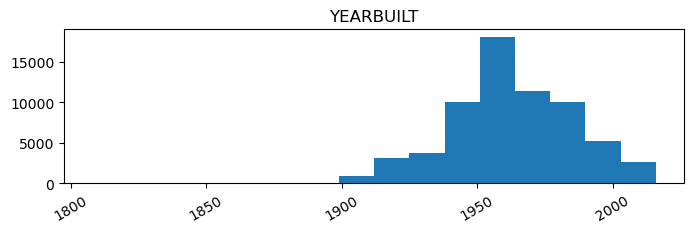

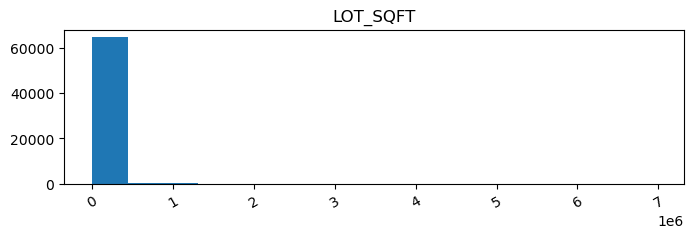

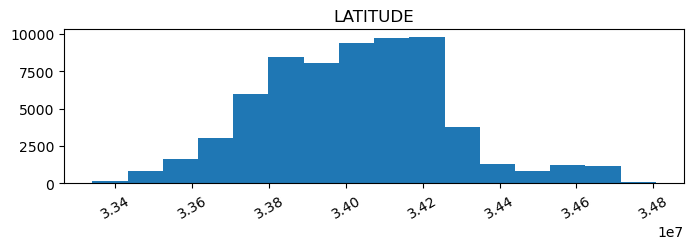

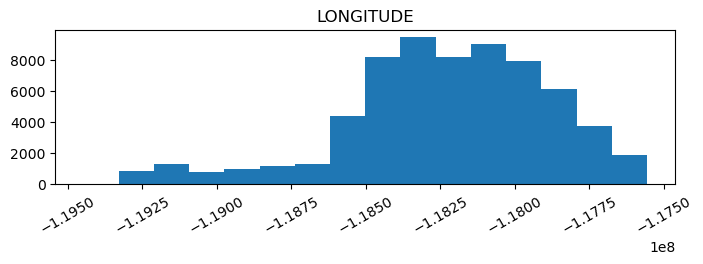

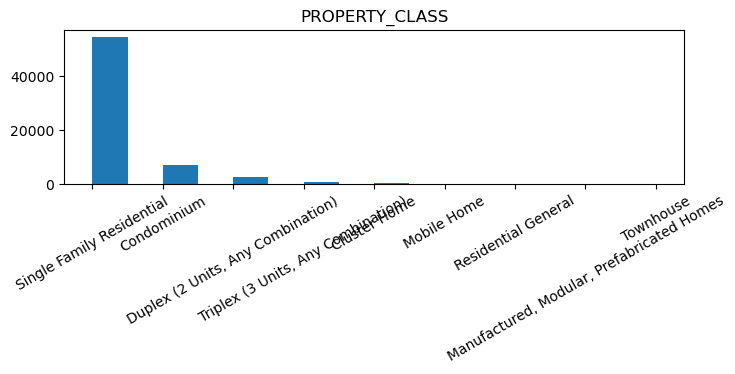

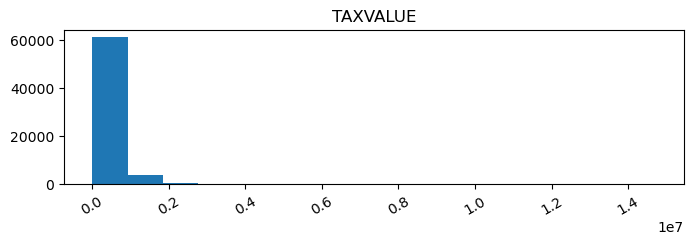

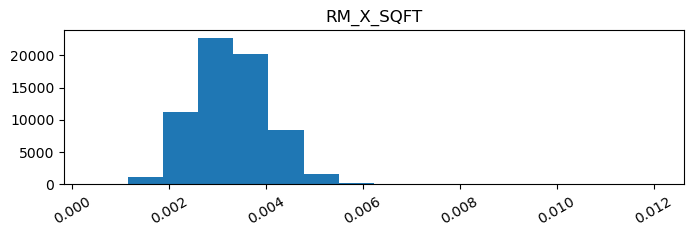

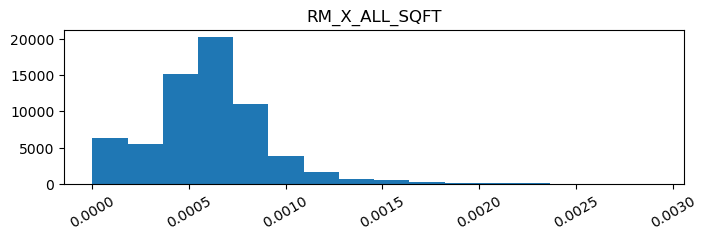

In [17]:
cols = ['county','bedrooms', 'bathrooms', 'sqft', 'yearbuilt', 'lot_sqft',\
        'latitude', 'longitude', 'property_class', 'taxvalue','rm_X_sqft', 'rm_X_all_sqft']

# Set a larger size for individual plots
individual_fig_size = (8, 2)

for col in cols:
    plt.figure(figsize=individual_fig_size)
    plt.title(col.upper()) # Convert title to uppercase
    df[col].hist(bins=16)
    plt.xticks(rotation=30)  # Rotate x-axis labels by 45 degrees
    plt.grid(False)
    plt.show()  # Show each plot individually


> reploting those columns that showed promising signs

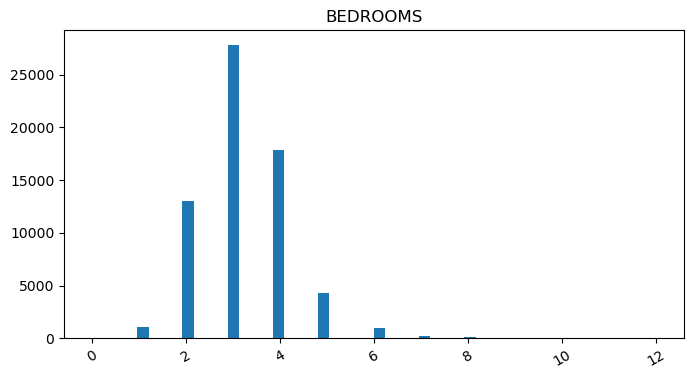

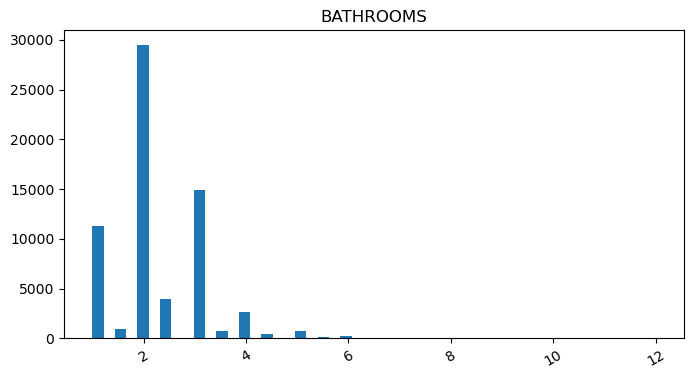

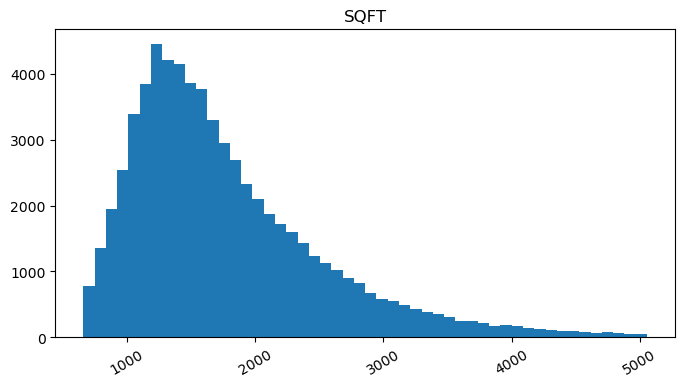

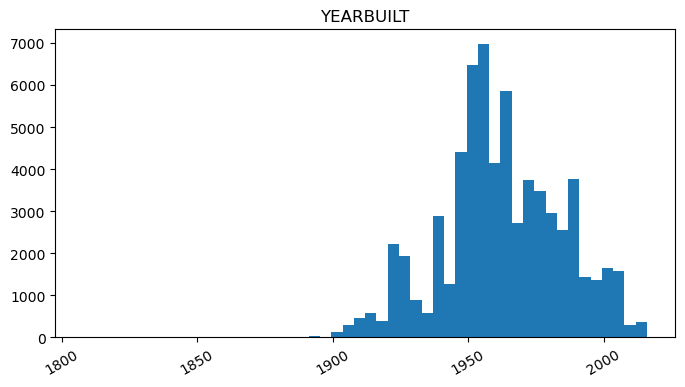

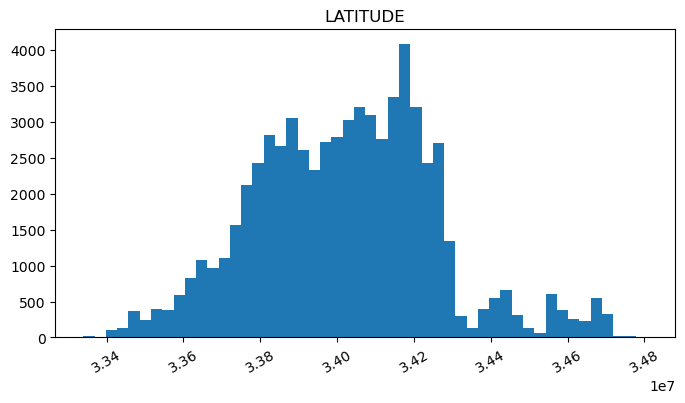

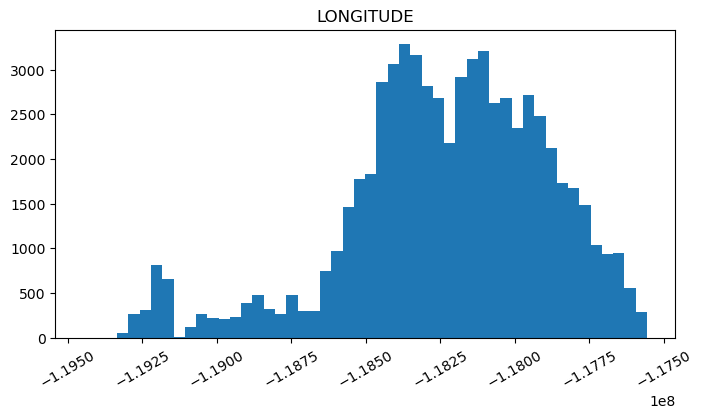

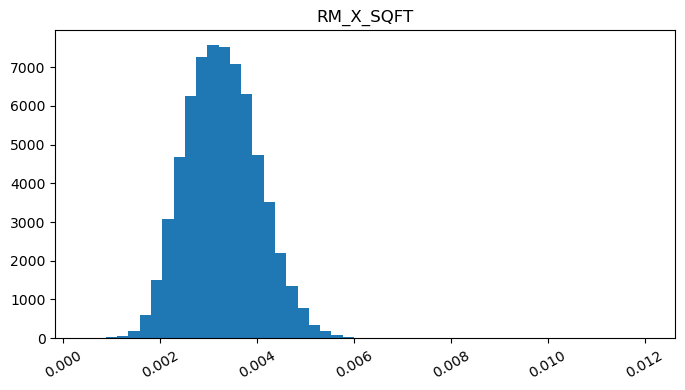

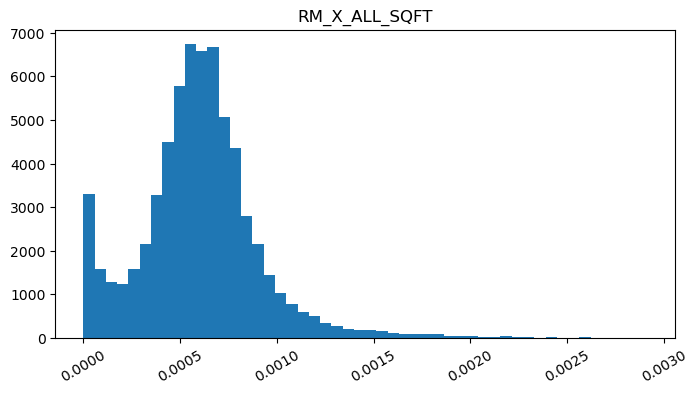

In [18]:
cols = ['bedrooms', 'bathrooms', 'sqft', 'yearbuilt',\
        'latitude', 'longitude','rm_X_sqft', 'rm_X_all_sqft']

# Set a larger size for individual plots
individual_fig_size = (8, 4)

for col in cols:
    plt.figure(figsize=individual_fig_size)
    plt.title(col.upper()) # Convert title to uppercase
    df[col].hist(bins=50)
    plt.xticks(rotation=30)  # Rotate x-axis labels by 45 degrees
    plt.grid(False)
    plt.show()  # Show each plot individually

## Spliting

In [19]:
train, validate, test = w.split_data(df)


    train -> (39247, 13)
    validate -> (13082, 13)
    test -> (13083, 13)


In [20]:
# scale that data!
# separate X and y!
X_train, y_train = train.drop(columns=['taxvalue','county','transaction_date', 'property_class']), train['taxvalue']
X_validate, y_validate = validate.drop(columns=['taxvalue','county','transaction_date', 'property_class']), validate['taxvalue']
X_test, y_test = test.drop(columns=['taxvalue','county','transaction_date', 'property_class']), test['taxvalue']

### NOTES:
- only using NON-NULLs
- removed 1% of top and bottom (2% total) values using the feature ranking 'sqft' as to remove possible human error in istances where '0' or an exaggerated number was imputed for the 'sqft' feature.
- I created a feature (column) named 'rm_X_qft' as a result of dividing ('bedrooms' and 'bathrooms') by 'sqft'
- I created a feature (column) named 'rm_X_all_sqft' as a result of dividing ('bedrooms'+'bathrooms') by ('sqft'+'lot_sqft')

## Hypotheses:

### Q1. Is there a relationship between sqft and taxvalue?

- both of my variables are continuous

- check for correlation

$H_0$: There is no linear correlation between sqft and taxvalue

$H_a$: There is a linear correlation between sqft and taxvalue

In [21]:
zillow_corr = train.corr(method='spearman')

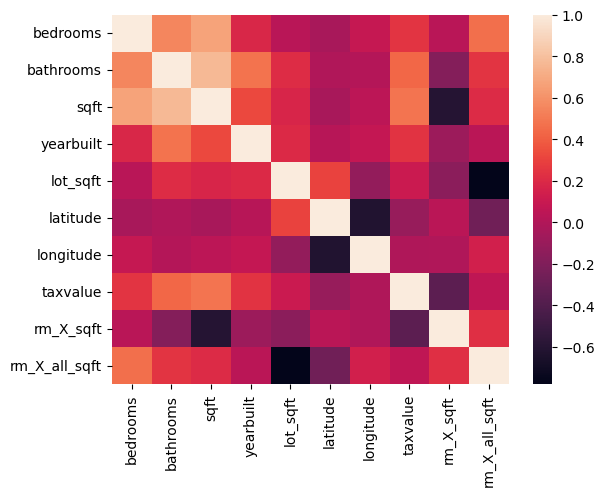

In [22]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(zillow_corr)
plt.show()

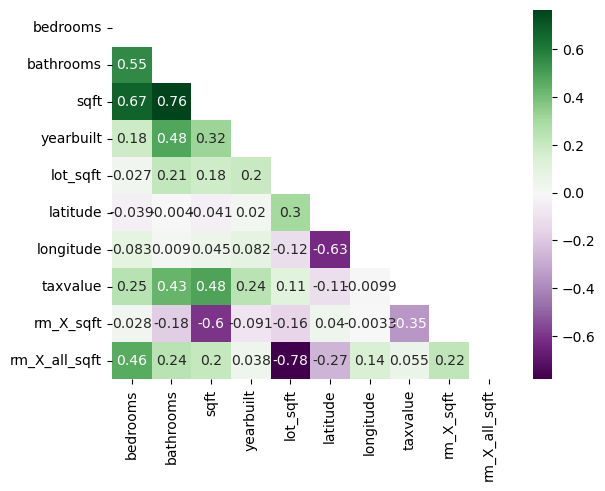

In [23]:
# pass my correlation matrix to Seaborn's heatmap with customization
sns.heatmap(zillow_corr, cmap='PRGn', annot=True, 
            mask=np.triu(zillow_corr))
plt.show()

In [24]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
r, p = spearmanr(train.sqft, train.taxvalue)

In [25]:
print(f"Spearman's r: {r}")
print(f"P-value: {p}")

Spearman's r: 0.48474084435085124
P-value: 0.0


In [26]:
w.eval_Spearman(r,p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.484741
P-value: 0.0


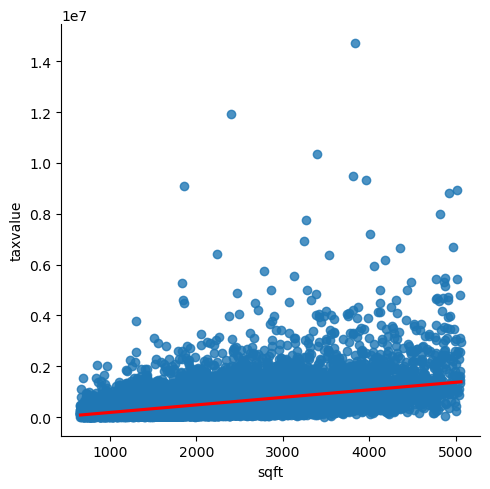

In [27]:
# I can really pop that line color if I want
sns.lmplot(data=train, x='sqft', y='taxvalue',
           line_kws={'color':'red'})
plt.show()

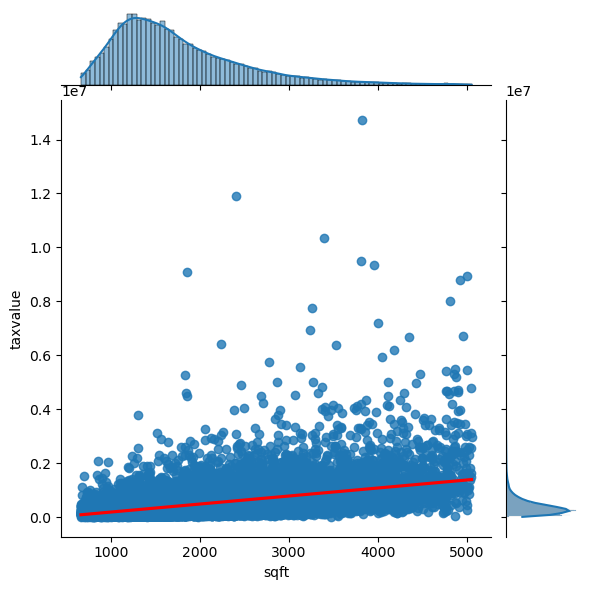

In [183]:
sns.jointplot(data=train, x='sqft', y='taxvalue',
             kind='reg',line_kws={'color':'red'})
#plt.title('sqft vs taxvalue')
plt.show()

### the SpearmanR test shows there is a monotonic relationship between sqft and taxvalue

### There seems to be a great correlation between sqft and taxvalue, as sqft increases, taxvalue also increases.  Which makes sense as the larger the constructed house, themore material it takes to be built, therefore more expensive. 

## Hypotheses:

### Q2. Is there a relationship between number of bedrooms and taxvalue?

- both of my variables are continuous

- check for correlation

$H_0$: There is no linear correlation between number of bedrooms and taxvalue

$H_a$: There is a linear correlation between number of bedrooms and taxvalue

In [29]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
r, p = spearmanr(train.bedrooms, train.taxvalue)

In [30]:
w.eval_Spearman(r,p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.248388
P-value: 0.0


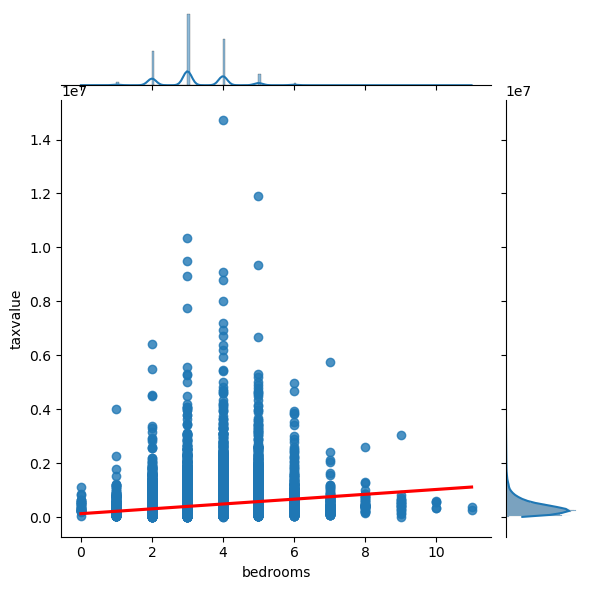

In [31]:
sns.jointplot(data=train, x='bedrooms', y='taxvalue',
             kind='reg',line_kws={'color':'red'})
plt.show()

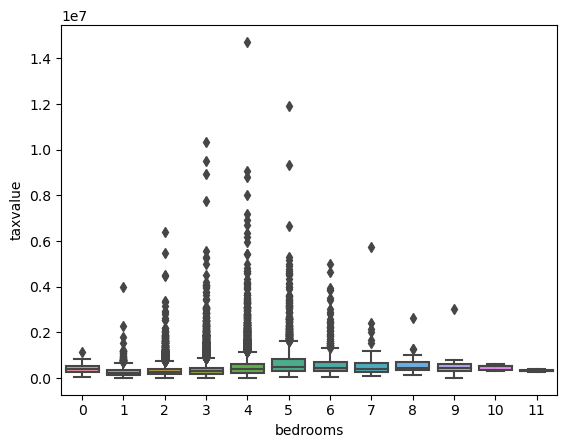

In [32]:
sns.boxplot(x='bedrooms', y='taxvalue', data=train)

plt.show()

### the SpearmanR test shows there is a monotonic relationship between number of bedrooms and taxvalue

### There seems to be a great correlation between number of bedrooms and taxvalue, as the number of bedrooms increases (up to 5) the value increases, after 5, the taxvalue is less reflected on number of bedrooms. 

## Hypotheses:

### Q3. Is there a relationship between number of bathrooms and taxvalue?

- both of my variables are continuous

- check for correlation

$H_0$: There is no linear correlation between number of bathrooms and taxvalue

$H_a$: There is a linear correlation between number of bathrooms and taxvalue

In [33]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
r, p = spearmanr(train.bathrooms, train.taxvalue)

In [34]:
w.eval_Spearman(r,p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.432327
P-value: 0.0


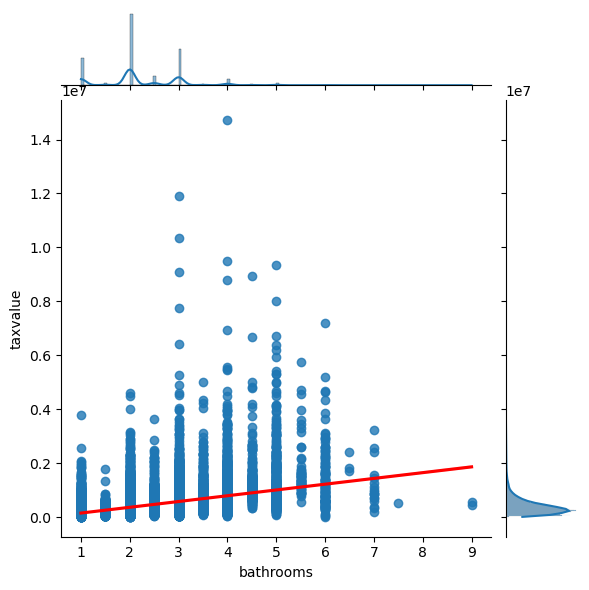

In [35]:
sns.jointplot(data=train, x='bathrooms', y='taxvalue',
             kind='reg',line_kws={'color':'red'})
plt.show()

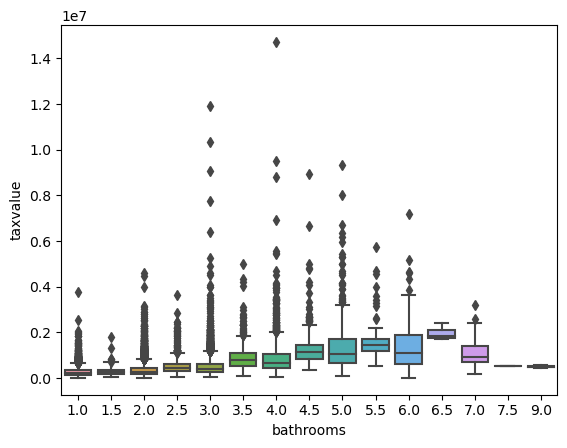

In [36]:
sns.boxplot(x='bathrooms', y='taxvalue', data=train)

plt.show()

### the SpearmanR test shows there is a monotonic relationship between number of bathrooms and taxvalue

### There seems to be a great correlation between number of bathrooms and taxvalue, as the number of bathrooms increases (up to 6.5) the value increases, after 7, the taxvalue is less reflected on number of bathrooms. 

# MODELING

In [37]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft', 'yearbuilt', 'lot_sqft', 'latitude',
       'longitude', 'rm_X_sqft', 'rm_X_all_sqft'],
      dtype='object')

In [38]:
X_validate.columns

Index(['bedrooms', 'bathrooms', 'sqft', 'yearbuilt', 'lot_sqft', 'latitude',
       'longitude', 'rm_X_sqft', 'rm_X_all_sqft'],
      dtype='object')

## SCALING

In [39]:
# make a scaler:
scaler = MinMaxScaler()
# fit and use a scaler:
X_train_scaled = scaler.fit_transform(X_train)
# use only on validate:
X_validate_scaled = scaler.transform(X_validate)
# use only on test:
X_test_scaled = scaler.transform(X_test)

In [40]:
y_train.head()

id
11115    674126
46061     77611
43858    675000
6995     295126
47713    555635
Name: taxvalue, dtype: int64

## BASELINE

In [41]:
# rather than restricting myself to just sqft, # of bedrooms and/or bathrooms,
# i'll play a bit more with the other freatures in this example notebook
X = X_train
y = y_train

In [42]:
# run with the mean, which we saw was the better baseline previously
baseline = y.mean()
round(baseline,2)

415153.18

In [43]:
def evaluate_reg(y, yhat):
    '''
    based on two series, y_act, y_pred, (y, yhat), we
    evaluate and return the root mean squared error
    as well as the explained variance for the data.
    
    returns: rmse (float), rmse (float)
    '''
    rmse = mean_squared_error(y, yhat, squared=False)
    r2 = r2_score(y, yhat)
    return rmse, r2

In [44]:
y.shape

(39247,)

In [45]:
# making a baseline guess dataframe
# that is the same shape as our y variable:
# np.repeat does what it sounds like
baseline_array = np.repeat(baseline, y.shape[0])

In [46]:
baseline_rmse, baseline_r2 = evaluate_reg(y, baseline_array)

In [47]:
eval_df = pd.DataFrame([{
    'model': 'baseline',
    'rmse': baseline_rmse,
    'r2': baseline_r2
}])

In [48]:
eval_df

,model,rmse,r2
0,baseline,426575.09291,0.0


## Ordinary Least Squares (OLS)

In [49]:
# initial ML model
lr1 = LinearRegression()

# rfe has entered the chat:
rfe = RFE(lr1, n_features_to_select=1)

# fit
rfe.fit(X, y)

# transform
X_train_rfe = rfe.transform(X)

X_val_rfe = rfe.transform(X_validate)

In [50]:
# feature that it selected?
rfe.get_feature_names_out()

array(['rm_X_sqft'], dtype=object)

In [51]:
# lr1 as an object was created for our RFE process,
# lets just use that same object for our first model
lr1.fit(X_train_rfe, y)

LinearRegression()

In [52]:
y_pred_val = lr1.predict(X_val_rfe)

In [53]:
# we filled in our first row of data
# for our evaluation df with training score
# lets ensure we compare apples to apples
# and continue to use training scores (at least this df*)
# * we still will want to retain these validation scores
# for comparison against our "best" models to check for overfitting
evaluate_reg(y, lr1.predict(X_train_rfe))

(401823.43820006505, 0.11268148712107817)

In [54]:
# pd.concat is a one-liner so I dont really feel the need to
# create a whole new function for this atm even though
# we will do it a few times:
rmse, r_2 = evaluate_reg(y, lr1.predict(X_train_rfe))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'ols_rfe_1',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)
eval_df

,model,rmse,r2
0,baseline,426575.09291,0.000000
1,ols_rfe_1,401823.43820,0.112681


In [55]:
# (𝛽_i , 𝛽_0)
(lr1.coef_, lr1.intercept_)

(array([-1.91844789e+08]), 1044507.0028316921)

In [56]:
val_rmse, val_r2 = evaluate_reg(y_validate, lr1.predict(X_val_rfe))
val_dict = {
    'model': 'ols_rfe_1',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}
val_scores = [val_dict]

## MULTIPLE REGRESSION

In [57]:
# Model using OLS
# same process here, we are just changing the number of
# features that we are using in selecting our outcome in OLS
lr2 = LinearRegression()

# fit it:
lr2.fit(X, y)

LinearRegression()

In [58]:
# Evaluate
# pd.concat is a one-liner so I dont really feel the need to
# create a whole new function for this atm even though
# we will do it a few times:
rmse, r_2 = evaluate_reg(y, lr2.predict(X))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'ols_all_feats',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)

In [59]:
val_rmse, val_r2 = evaluate_reg(y_validate, lr2.predict(X_validate))
val_dict = {
    'model': 'ols_all_feats',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}
val_scores.append(val_dict)
eval_df

,model,rmse,r2
0,baseline,426575.09291,0.000000
1,ols_rfe_1,401823.43820,0.112681
2,ols_all_feats,347860.15437,0.335005


## LassoLars

In [60]:
# fit a version of this that has an alpha of 1:
# make it
lasso = LassoLars(alpha=1)
# fit it:
lasso = lasso.fit(X, y)
(lasso.coef_, lr2.coef_)

(array([-1.49665110e+05,  6.46402692e+03,  4.88326988e+02, -4.14138358e+02,
        -1.93815512e-02, -3.01896738e-01, -1.29601365e-01,  1.19636282e+08,
        -1.43842408e+07]),
 array([-1.52392761e+05,  2.03786744e+03,  5.01416443e+02, -4.17306297e+02,
        -2.76066706e-02, -3.07748139e-01, -1.30954047e-01,  1.30003809e+08,
        -2.93004551e+07]))

In [61]:
# Evaluate
# pd.concat is a one-liner so I dont really feel the need to
# create a whole new function for this atm even though
# we will do it a few times:
rmse, r_2 = evaluate_reg(y, lasso.predict(X))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'lasso',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)

In [62]:
val_rmse, val_r2 = evaluate_reg(y_validate, lasso.predict(X_validate))
val_dict = {
    'model': 'lasso',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}
val_scores.append(val_dict)
eval_df

,model,rmse,r2
0,baseline,426575.092910,0.000000
1,ols_rfe_1,401823.438200,0.112681
2,ols_all_feats,347860.154370,0.335005
3,lasso,347896.491872,0.334866


## Polynomial Regression

In [63]:
# do a preprocessing step with our training data
# to transorm our x into combinations of x and x^2, x^3, etc
pf = PolynomialFeatures(degree=2)
# fit the thing, also use it
x_train_sq = pf.fit_transform(X)
# use this transformer to change our val and test:
x_val_sq = pf.transform(X_validate)
x_test_sq = pf.transform(X_test)

In [64]:
# make a new model for our polynomial regressor:
plyreg = LinearRegression()
plyreg.fit(x_train_sq, y)

LinearRegression()

In [65]:
# pd.concat is a one-liner so I dont really feel the need to
# create a whole new function for this atm even though
# we will do it a few times:
rmse, r_2 = evaluate_reg(y, plyreg.predict(x_train_sq))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'quad_reg',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)

In [66]:
val_rmse, val_r2 = evaluate_reg(y_validate, plyreg.predict(x_val_sq))
val_dict = {
    'model': 'quad_reg',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}
val_scores.append(val_dict)
eval_df

,model,rmse,r2
0,baseline,426575.092910,0.000000
1,ols_rfe_1,401823.438200,0.112681
2,ols_all_feats,347860.154370,0.335005
3,lasso,347896.491872,0.334866
4,quad_reg,336327.738211,0.378367


In [82]:
# feature that it selected?
plyreg.get_feature_names_out()

AttributeError: 'LinearRegression' object has no attribute 'get_feature_names_out'

## Generalized Linear Model (GLM)

In [67]:
# same process as before!
# make the dang thing!
gams50 = TweedieRegressor(power=0.5)
# fit the dang ol thing
gams50.fit(X, y)
# use it!

TweedieRegressor(power=0.5)

In [68]:
# pd.concat is a one-liner so I dont really feel the need to
# create a whole new function for this atm even though
# we will do it a few times:
rmse, r_2 = evaluate_reg(y, gams50.predict(X))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'gamma_ols_0.5',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)
eval_df

,model,rmse,r2
0,baseline,426575.092910,0.000000
1,ols_rfe_1,401823.438200,0.112681
2,ols_all_feats,347860.154370,0.335005
3,lasso,347896.491872,0.334866
4,quad_reg,336327.738211,0.378367
5,gamma_ols_0.5,349414.577380,0.329049


In [69]:
# same process as before!
# make the dang thing!
gams25 = TweedieRegressor(power=0.25)
# fit the dang ol thing
gams25.fit(X, y)
# use it!

TweedieRegressor(power=0.25)

In [70]:
# pd.concat is a one-liner so I dont really feel the need to
# create a whole new function for this atm even though
# we will do it a few times:
rmse, r_2 = evaluate_reg(y, gams25.predict(X))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'gamma_ols_0.25',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)
eval_df

,model,rmse,r2
0,baseline,426575.092910,0.000000
1,ols_rfe_1,401823.438200,0.112681
2,ols_all_feats,347860.154370,0.335005
3,lasso,347896.491872,0.334866
4,quad_reg,336327.738211,0.378367
5,gamma_ols_0.5,349414.577380,0.329049
6,gamma_ols_0.25,377376.316730,0.217367


## Evaluate on Best Model

In [71]:
val_scores = pd.DataFrame(eval_df)
val_scores

,model,rmse,r2
0,baseline,426575.092910,0.000000
1,ols_rfe_1,401823.438200,0.112681
2,ols_all_feats,347860.154370,0.335005
3,lasso,347896.491872,0.334866
4,quad_reg,336327.738211,0.378367
5,gamma_ols_0.5,349414.577380,0.329049
6,gamma_ols_0.25,377376.316730,0.217367


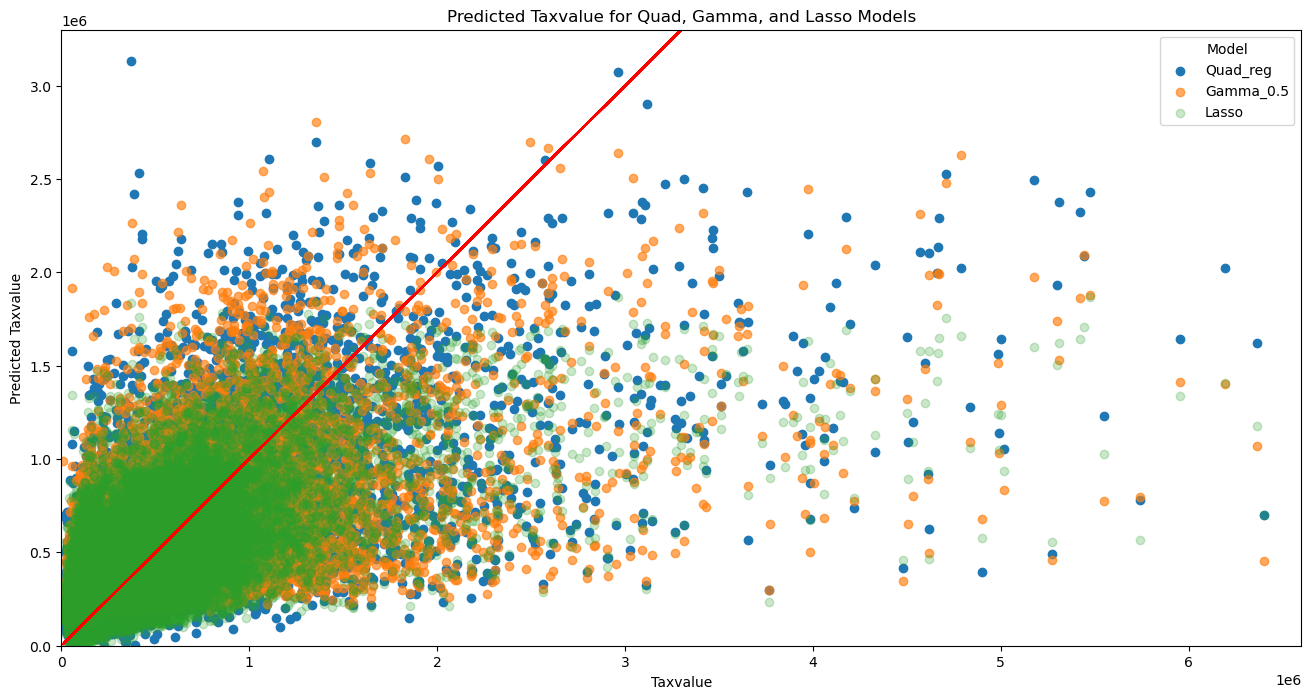

In [180]:
plt.figure(figsize=(16, 8))
plt.scatter(y, plyreg.predict(x_train_sq), label='Quad_reg', alpha=1)
plt.scatter(y, gams50.predict(X), label= 'Gamma_0.5', alpha=0.66)
plt.scatter(y, lasso.predict(X), label= 'Lasso', alpha=0.25)
plt.title('Predicted Taxvalue for Quad, Gamma, and Lasso Models')
plt.plot(y,y, ls='-', c='r')
plt.ylabel('Predicted Taxvalue')
plt.xlabel('Taxvalue')
plt.legend(title='Model')
# Set the axis limits
plt.xlim(left=0, right=6600000) 
plt.ylim(bottom=0, top=3300000)

plt.show()

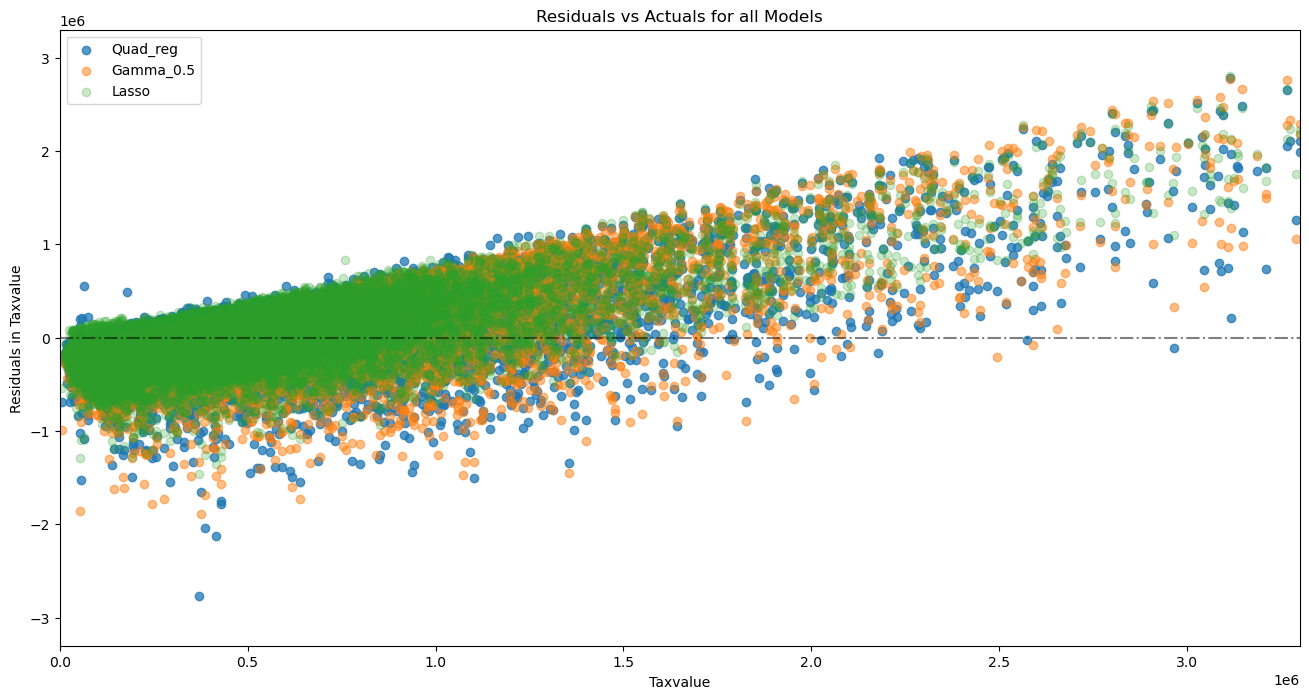

In [179]:
plt.figure(figsize=(16, 8))
#plt.scatter(y, y - lr1.predict(X_train_rfe), label='rfe', alpha=0.65)
#plt.scatter(y, y - lr2.predict(X), label='ols', alpha=0.55)
plt.scatter(y, y - plyreg.predict(x_train_sq), label='Quad_reg', alpha=0.75)
plt.scatter(y, y - gams50.predict(X), label='Gamma_0.5', alpha=0.5)
plt.scatter(y, y - lasso.predict(X), label='Lasso', alpha=0.25)
plt.title('Residuals vs Actuals for all Models')
plt.axhline(0, ls='-.', c='k', alpha=0.5)
plt.xlabel('Taxvalue')
plt.ylabel('Residuals in Taxvalue')
plt.legend()
# Set the axis limits
plt.xlim(left=0, right=3300000) 
plt.ylim(bottom=-3300000, top=3300000)
plt.show()

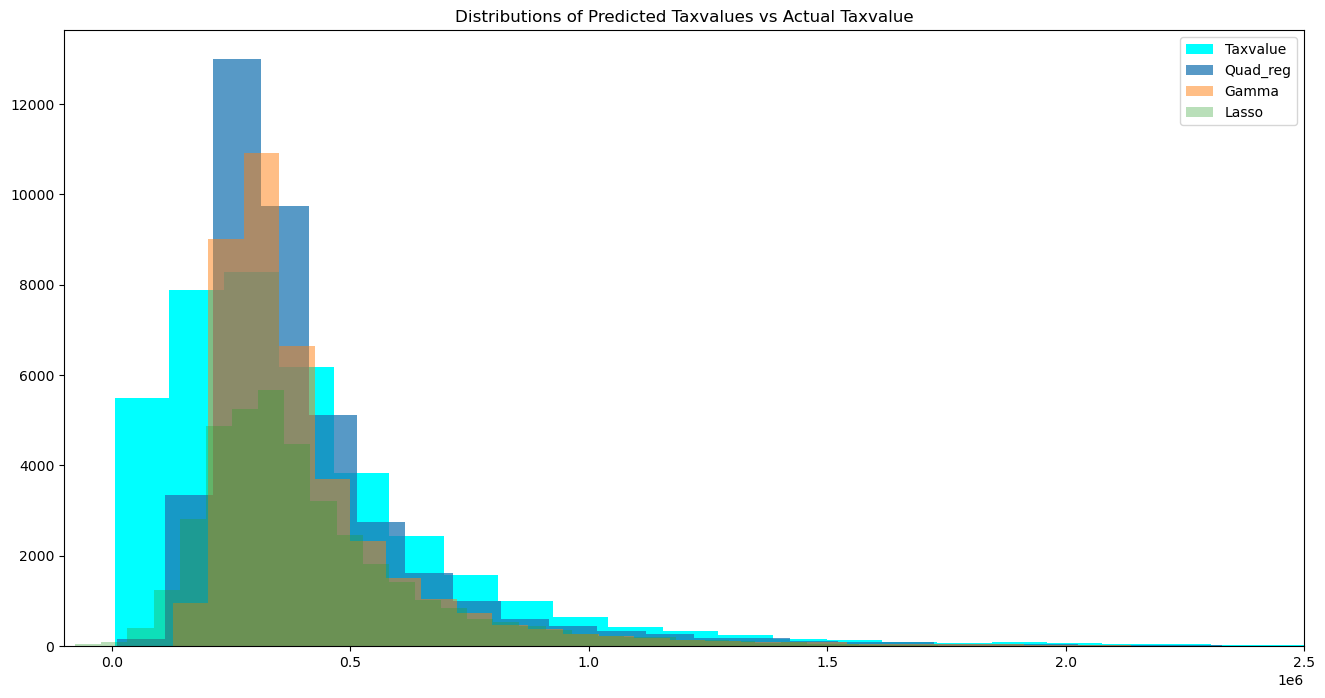

In [174]:
plt.figure(figsize=(16,8))
# plt.hist(lr1.predict(X_train_rfe), alpha=0.5, label='rfe')
plt.hist(y, alpha=1, label='Taxvalue',color='cyan',bins=128)
plt.hist(plyreg.predict(x_train_sq), label='Quad_reg', alpha=0.75,bins=36)
plt.hist(gams50.predict(X), label= 'Gamma', alpha=0.5,bins=36)
plt.hist(lasso.predict(X), label= 'Lasso', alpha=0.33, bins=36)
plt.legend()
plt.title('Distributions of Predicted Taxvalues vs Actual Taxvalue')
# Set the x-axis limits
plt.xlim(left=-100000, right=2500000)  # Replace max_x_value with your desired maximum value

plt.show()

In [181]:
val_scores

,model,rmse,r2
0,baseline,426575.092910,0.000000
1,ols_rfe_1,401823.438200,0.112681
2,ols_all_feats,347860.154370,0.335005
3,lasso,347896.491872,0.334866
4,quad_reg,336327.738211,0.378367
5,gamma_ols_0.5,349414.577380,0.329049
6,gamma_ols_0.25,377376.316730,0.217367
